In [1]:
# 1. Location Estimation

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
import cv2 as cv
import random
import matplotlib.pyplot as plt

2025-03-24 19:28:37.842329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742812117.852928  203459 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742812117.856187  203459 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742812117.865690  203459 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742812117.865700  203459 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742812117.865702  203459 computation_placer.cc:177] computation placer alr

In [3]:
# Generate training images and labels
N=4000
H,W=256,256
train_img=np.zeros([N,H,W,3],dtype=np.uint8)
train_img.fill(255)
train_label=np.zeros([N,2],dtype=np.int32)
bh,bw=50,50

for n in range(N):
  x,y=random.randint(0,W-1),random.randint(0,H-1)
  if(x-bw/2<0):
    x=x-(x-bw/2)
  elif(x+bw/2>W-1):
    x=x-(x+bw/2-(W-1))

  if(y-bh/2<0):
    y=y-(y-bh/2)
  elif(y+bh/2>H-1):
    y=y-(y+bh/2-(H-1))

  x=int(x)
  y=int(y)
  train_label[n,0]=x
  train_label[n,1]=y
  cv.rectangle(train_img[n], (x-int(bw/2),y-int(bh/2)), (x+int(bw/2),y+int(bh/2)),
  color=(0,255,0),thickness=-1)

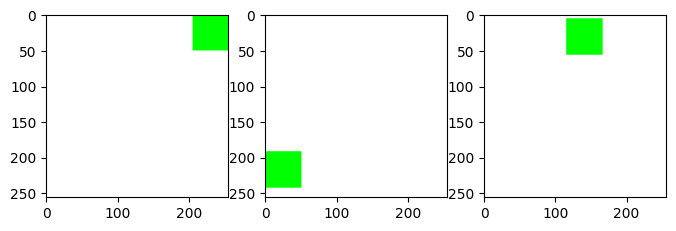

In [4]:
# Display some images

fig = plt.figure(figsize=(8,8))
rows=1
columns=3

for idx in range(1, columns * rows +1):
    fig.add_subplot(rows, columns, idx)
    plt.imshow(train_img[idx])

In [5]:
# Preprocess data
train_img = tf.keras.applications.vgg16.preprocess_input(train_img)
train_label=train_label.astype(np.float32)
train_label[:,0]=train_label[:,0]/W
train_label[:,1]=train_label[:,1]/H

# Build model
base_model = tf.keras.applications.VGG16(input_shape=[H,W,3], include_top=False,
weights='imagenet')
x = base_model.output
x = tf.keras.layers.Flatten()(x)
predictions = tf.keras.layers.Dense(2, activation='sigmoid')(x) # x, y의 값만 필요 하므로 2, 0 to 1의 값이 필요 하므로 sigmoid
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.summary()

I0000 00:00:1742812121.164507  203459 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6194 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:26:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        65,538 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,226 (56.38 MB)

 Trainable params: 14,780,226 (56.38 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train and save model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mse')
history = model.fit(train_img,train_label, epochs=10, batch_size=20,
validation_split=0.25)
model.save('model1.keras')

2025-03-24 19:28:42.874841: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2359296000 exceeds 10% of free system memory.
2025-03-24 19:28:44.126353: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2359296000 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1742812126.648377  203716 service.cc:152] XLA service 0x7f05b4008b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742812126.648403  203716 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-03-24 19:28:46.685865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742812126.985590  203716 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-24 19:28:54.980065: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


  1/150 ━━━━━━━━━━━━━━━━━━━━ 46:41 19s/step - loss: 0.1989

I0000 00:00:1742812143.696654  203716 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.0607

2025-03-24 19:29:33.201583: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 237ms/step - loss: 0.0604 - val_loss: 0.0016
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 207ms/step - loss: 0.0011 - val_loss: 8.2580e-04
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - loss: 5.8268e-04 - val_loss: 4.7353e-04
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 212ms/step - loss: 3.3282e-04 - val_loss: 4.2358e-04
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 215ms/step - loss: 2.4517e-04 - val_loss: 3.4467e-04
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - loss: 1.8799e-04 - val_loss: 2.5645e-04
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - loss: 1.6660e-04 - val_loss: 2.4245e-04
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - loss: 1.6140e-04 - val_loss: 2.8656e-04
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - loss: 1.1925e-04 - val_loss: 1.7079e-04
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - loss: 9.6672e-05 - val_loss: 2.1286e-04


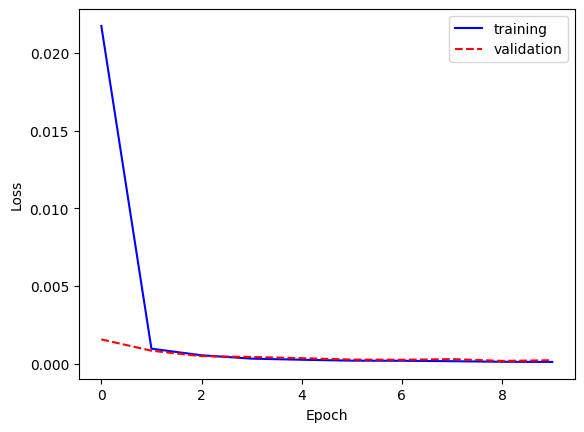

In [7]:
# Show training history
plt.figure()
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.show()

In [8]:
# Generate test images and labels
N=5
H,W=256,256
test_img=np.zeros([N,H,W,3],dtype=np.uint8)
test_img.fill(255)
test_label=np.zeros([N,2],dtype=np.int32)

bh,bw=50,50
for n in range(N):
  x,y=random.randint(0,W-1),random.randint(0,H-1)
  if(x-bw/2<0):
    x=x-(x-bw/2)
  elif(x+bw/2>W-1):
    x=x-(x+bw/2-(W-1))

  if(y-bh/2<0):
    y=y-(y-bh/2)
  elif(y+bh/2>H-1):
    y=y-(y+bh/2-(H-1))

  x=int(x)
  y=int(y)
  test_label[n,0]=x
  test_label[n,1]=y
  cv.rectangle(test_img[n], (x-int(bw/2),y-int(bh/2)), (x+int(bw/2),y+int(bh/2)), color=(0,255,0),thickness=-1)

In [9]:
# Preprocess test images
test_img_ = tf.keras.applications.vgg16.preprocess_input(test_img)

# Predict object locations in test images
model=tf.keras.models.load_model('model1.keras')
out=model.predict(test_img_)

# 픽셀 좌표계로 다시 변환
out[:,0]=out[:,0]*W
out[:,1]=out[:,1]*H

# Display prediction results
for n in range(N):
  x=out[n,0].astype('int')
  y=out[n,1].astype('int')
  cv.circle(test_img[n],center=(x,y),radius=2,color=(0,0,0),thickness=2)
  cv_imshow(test_img[n])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


NameError: name 'cv_imshow' is not defined

In [ ]:
# 2. Center Location + Size Estimation (width & height)

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import cv2 as cv
import random
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt

In [ ]:
# Generate training images and labels
N=2000
H,W=256,256
train_img=np.zeros([N,H,W,3],dtype=np.uint8)
train_img.fill(255)
train_label=np.zeros([N,4],dtype=np.int32) # x, y, W, H의 4개의 레이블이 필요하다
for n in range(N):
  x,y=random.randint(0,W-1),random.randint(0,H-1)
  bw,bh=random.randint(int(W/16),int(W/4)),random.randint(int(H/16),int(H/4))
  if(x-bw/2<0): x=x-(x-bw/2)
  elif(x+bw/2>W-1): x=x-(x+bw/2-(W-1))

  if(y-bh/2<0): y=y-(y-bh/2)
  elif(y+bh/2>H-1): y=y-(y+bh/2-(H-1))

  x=int(x); y=int(y)
  train_label[n,0]=x
  train_label[n,1]=y
  train_label[n,2]=bw
  train_label[n,3]=bh
  cv.rectangle(train_img[n],(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),
  color=(0,255,0),thickness=-1)

In [ ]:
# Display some images

fig = plt.figure(figsize=(8,8))
rows=1
columns=3

for idx in range(1, columns * rows +1):
    fig.add_subplot(rows, columns, idx)
    plt.imshow(train_img[idx])

In [ ]:
# Preprocess data
train_img = tf.keras.applications.vgg16.preprocess_input(train_img)
train_label=train_label.astype(np.float32)
train_label[:,0]=train_label[:,0]/W
train_label[:,1]=train_label[:,1]/H
# W, H의 최대값으로 regularization
train_label[:,2]=train_label[:,2]/(W/4)
train_label[:,3]=train_label[:,3]/(H/4)

# Build model
base_model = tf.keras.applications.VGG16(input_shape=[H,W,3], include_top=False,
weights='imagenet')
x = base_model.output
x = tf.keras.layers.Flatten()(x)
predictions = tf.keras.layers.Dense(4, activation='sigmoid')(x) # x, y, w, h의 4개의 변수를 알아내야 하므로 4로 선언
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.summary()

In [ ]:
# Train and save model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mse')
history = model.fit(train_img,train_label,epochs=20,batch_size=50,validation_split=0.25)
model.save('model2.keras')

In [ ]:
# Show training history
plt.figure()
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.show()

In [ ]:
# Generate test images and labels
N=6
H,W=256,256
test_img=np.zeros([N,H,W,3],dtype=np.uint8)
test_img.fill(255)
test_label=np.zeros([N,4],dtype=np.int32)

for n in range(N):
  x,y=random.randint(0,W-1),random.randint(0,H-1)
  bw,bh=random.randint(int(W/16),int(W/4)),random.randint(int(H/16),int(H/4))

if(x-bw/2<0): x=x-(x-bw/2)
elif(x+bw/2>W-1): x=x-(x+bw/2-(W-1))

if(y-bh/2<0): y=y-(y-bh/2)
elif(y+bh/2>H-1): y=y-(y+bh/2-(H-1))

x=int(x); y=int(y)
test_label[n,0]=x
test_label[n,1]=y
test_label[n,2]=bw
test_label[n,3]=bh
cv.rectangle(test_img[n],(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),
color=(0,255,0),thickness=-1)

In [ ]:
# Preprocess test images
test_img_ = tf.keras.applications.vgg16.preprocess_input(test_img)
# Predict object locations in test images
model=tf.keras.models.load_model('model2.keras')
out=model.predict(test_img_)
out[:,0]=out[:,0]*W
out[:,1]=out[:,1]*H
out[:,2]=out[:,2]*(W/4)
out[:,3]=out[:,3]*(H/4)

# Display prediction results
for n in range(N):
  x=out[n,0].astype('int')
  y=out[n,1].astype('int')
  bw=out[n,2].astype('int')
  bh=out[n,3].astype('int')

  cv.circle(test_img[n],center=(x,y),radius=2,color=(0,0,0),thickness=2)
  cv.rectangle(test_img[n],(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),
  color=(0,0,0),thickness=2)
  cv_imshow(test_img[n])